In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# initalize file paths
metrics_file = "/Users/armanimanov/Downloads/cons_stat.csv"
subjects_file = "/Users/armanimanov/Downloads/abcd_p_demo.csv"

In [13]:
tract_metrics = pd.read_csv(metrics_file)
demo_data = pd.read_csv(subjects_file)

tract_metrics['src_subject_id'] = tract_metrics['src_subject_id'].str.replace('sub-', '')
demo_data['src_subject_id'] = demo_data['src_subject_id'].str.replace('NDAR_', 'NDAR')

# remove rows with eventname column not equal to baseline_year_1_arm_1
demo_data = demo_data[demo_data['eventname'] == 'baseline_year_1_arm_1']

merged_data = pd.merge(tract_metrics, demo_data[["src_subject_id", "demo_brthdat_v2", "demo_sex_v2"]], on="src_subject_id")


In [15]:
merged_data

,src_subject_id,number of tracts,mean length(mm),span(mm),curl,elongation,total volume(mm^3),1st quarter volume(mm^3),2nd and 3rd quarter volume(mm^3),4th quarter volume(mm^3),...,md,ad,rd,iso,rdi,nrdi02L,nrdi04L,nrdi06L,demo_brthdat_v2,demo_sex_v2
0,NDARINVM0JXYXX1,40449,108.535,30.2375,3.58941,6.54671,23428.9,5816.38,11796.1,5816.38,...,0.781904,1.12973,0.607992,0.894079,0.666348,0.559617,0.136860,0.001490,9.0,2.0
1,NDARINVZ4KYLWJA,46700,118.503,26.3252,4.50150,6.79128,28338.2,6162.74,16012.7,6162.74,...,0.831735,1.24739,0.623905,0.847267,0.630061,0.533738,0.132230,0.001169,9.0,2.0
2,NDARINVUYYEU9U1,39585,126.825,37.4243,3.38883,7.66274,27285.6,10010.20,7265.1,10010.20,...,0.832681,1.25304,0.622501,0.735721,0.555540,0.466367,0.113954,0.001026,9.0,1.0
3,NDARINVGK2BKPLT,54396,108.496,36.6165,2.96305,4.91993,41439.9,7754.56,25930.8,7754.56,...,0.773990,1.20800,0.556985,0.712954,0.541558,0.448733,0.107148,0.000549,10.0,1.0
4,NDARINVXBB6NT2L,51965,124.135,41.7878,2.97060,5.46535,50296.2,13952.90,22390.4,13952.90,...,0.854422,1.23787,0.662699,0.735895,0.549685,0.462959,0.113687,0.000975,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,NDARINVNWMRHTJT,55499,108.503,31.9682,3.39410,4.80316,43487.4,9980.15,23527.1,9980.15,...,0.811017,1.23544,0.598804,0.798342,0.598742,0.502760,0.122983,0.001456,9.0,2.0
4991,NDARINVJ6EH2T8Z,38272,109.538,29.3982,3.72600,5.96286,29031.5,6522.62,15986.3,6522.62,...,0.804673,1.20620,0.603909,0.697950,0.519548,0.436651,0.106802,0.000867,9.0,2.0
4992,NDARINVTFJ2LGCD,57128,111.642,34.5323,3.23298,5.72565,33337.2,7828.25,17680.7,7828.25,...,0.812787,1.22716,0.605601,0.794972,0.594329,0.500377,0.122775,0.001046,9.0,1.0
4993,NDARINVGUEFFMBB,45405,109.361,32.5672,3.35802,5.53772,33498.1,6852.41,19793.2,6852.41,...,0.800408,1.20747,0.596876,0.710832,0.529455,0.446306,0.109727,0.001113,10.0,1.0


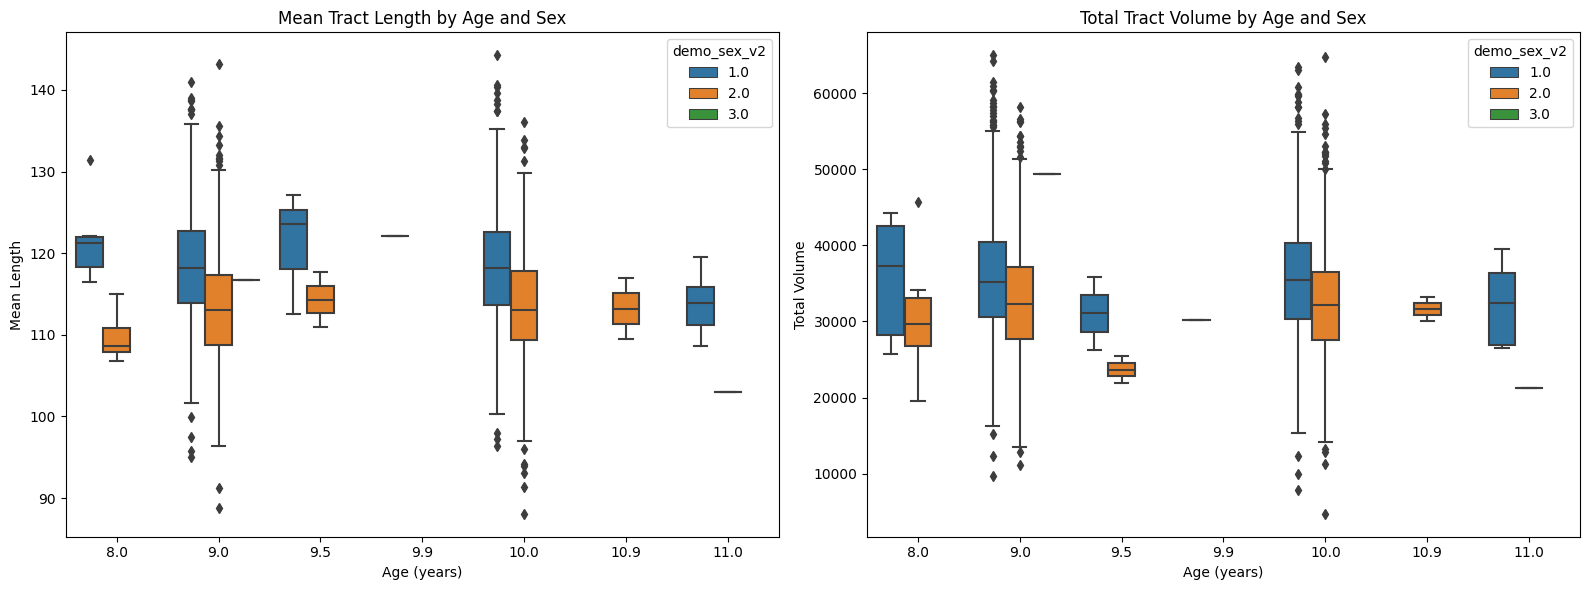

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# mean length vs age
sns.boxplot(x="demo_brthdat_v2", y="mean length(mm)", hue="demo_sex_v2", data=merged_data, ax=ax1)
ax1.set_title("Mean Tract Length by Age and Sex")
ax1.set_xlabel("Age (years)")
ax1.set_ylabel("Mean Length")

# total vol vs age
sns.boxplot(x="demo_brthdat_v2", y="total volume(mm^3)", hue="demo_sex_v2", data=merged_data, ax=ax2)
ax2.set_title("Total Tract Volume by Age and Sex")
ax2.set_xlabel("Age (years)")
ax2.set_ylabel("Total Volume")

plt.tight_layout()
plt.show()